In [250]:
import thinkdsp as td

class JihaoTrombone(td.Chirp):
    """Represents a trombone-like signal with varying frequency."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.
        ts: float array of times
        returns: float wave array
        """
        l1, l2=  1.0/self.start, 1.0/self.end
        lengths= np.linspace(l1, l2, len(ts)-1)
        freqs=   1/lengths
        return self._evaluate(ts, freqs)


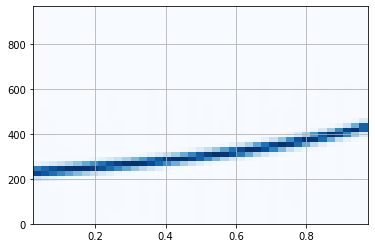

In [257]:
A3=  220 
E3=  330
A4=  440

s1= JihaoTrombone(start= A3, end= A4)
w1= s1.make_wave(duration=1)
w1.make_spectrogram(512).plot(high=1000)
w1.make_audio()

In [135]:
s2= JihaoTrombone(start= A4, end= E3)
w2= s2.make_wave(duration=1)
w2.make_audio()

In [139]:
w3= w1|w2
w3.make_audio()

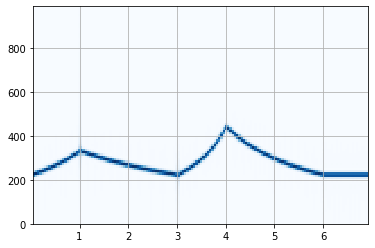

In [179]:
w= (
 JihaoTrombone(A3,E3).make_wave(1)
|JihaoTrombone(E3,A3).make_wave(2)
|JihaoTrombone(A3,A4).make_wave(1)
|JihaoTrombone(A4,A3).make_wave(2)
|JihaoTrombone(A3,A3).make_wave(1)
)
w.make_spectrogram(1024).plot(high=1000)
w.make_audio()

In [243]:
r= 2**(1/12)

[A,A1,B,C,C1,D,D1,E,F,F1,G,G1,a]= \
[440*r**i for i in range(12+1)]


In [248]:
song= [A,A,E,E,F1,F1,E,E]

s= JihaoTrombone(song[0],song[1]).make_wave(.5)
for x in song[1:]:
    s= (s|JihaoTrombone(x,x).make_wave(.5))


In [249]:
s.make_audio()